# Лабораторное занятие 13: Работа с видео при помощи преобразования Фурье и собственных чисел матриц

1. Из списка ниже выберите любой сервис, который сгенерирует Вам видео. Выберите любой, промпт тоже на Ваш вкус (постарайтесь, пожалуйста, исключить темы жестокости, интоксикации, оскорбительные и другие нелицепритятные). Длительность видео 5-10 секунд. Пожалуйста, не застревайте на этом задании слишком на долго. Если совсем не получается по любым причинам, просто скачайте видео из ленты сгенерированных с одного из этих сайтов.
2. Скачайте видео в формате mp4 и отправьте в общий чат в телеграм.
3. Загрузите видео файл туда, где будете исполнять код, например Google Colab.
4. Укажите в ноутбуке использованный сервис генерации видео и промпт. Если использовали изображение, то укажите сопроводительный промпт для генерации видео из изображения.
5. Проанализируйте полученное видео. Выявите основные направления улучшения сгенерированного видео. Неидеальные видео - это простор для улучшений! А идеальные видео - это запрос на более детальный анализ, включая размер файла, эффект зловещей долины, вдохновление на создание собственной GenAI или видео-кодека, анализ применимости в практических целях (например для создания спец-эффектов в видео и автоматического видеомонтажа). *Это кстати вообще ведет к конспирологической теории мертвого интернета, потому что современные ИИ могут обеспечивать полный цикл создания и потребления контента: сценарий, монтаж/генерация, text-to-speach и всё остальное.*
6. Используя приведенный код попробуйте улучшить (или во всяком случае изменить) видео: добавьте или удалите шумы, выделите кадры, в которых меняется сцена, добавьте водяной знак (видимый или невидимый, чтобы обезопасить свой файл), попробуйте сжать видео, не меняя кодек.
7. Измените видео кодек на H265. Если Ваша система его не поддерживает, попробуйте VP9.
8. Отправьте полученный измененный видео файл в телеграмм как репост на своё предыдущее видео. Желательно сделать этот пункт 1 раз в конце занятия.
9.  Отправьте архив с ноутбуком (файлы изображений и видео в архив помещать не нужно) в Moodle.

1. [Kling](https://klingai.com/global/)
2. [Hailuoai](https://hailuoai.video/)
3. [Sora](https://sora.chatgpt.com/explore)
4. [Hunyuan Video](https://aivideo.hunyuan.tencent.com/) (нужен китайский номер телефона)
5. [PixVerse V3.5](https://app.pixverse.ai/onboard)
6. [Runway](https://runwayml.com/product)
7. [Google Veo](https://deepmind.google/technologies/veo/veo-2/)
8. [Vidu](https://www.vidu.com/)
9. [Dream Machine](https://dream-machine.lumalabs.ai/)
10. [Шедеврум](https://shedevrum.ai/)
11. [Pictory](https://pictory.ai/?el=2000b&htrafficsource=pictoryblog)
12. [DeepbrainAI](https://www.aistudios.com/ru?utm_source=topaitools)
13. [Invideo](https://invideo.io/)
14. [Synthesia](https://www.synthesia.io/)
15. [VEED](https://www.veed.io/)
16. [D-ID](https://www.d-id.com/)
17. [Heygen](https://www.heygen.com/)
18. [Colossyan](https://www.colossyan.com/)
19. [Tavus](https://www.tavus.io/)
20. [Elai.io](https://elai.io/)
21. [Neural Actors](https://neuralactors.com/)
22. [Stable Diffusion Videos](https://stablevideodiffusion.pro/)
23. [Lumen5](https://lumen5.com/)
24. [Designs](https://designs.ai/)
25. [Fliki](https://fliki.ai/)

## Ваш сервис генерации видео и промпт:
Сервис: Qwen (да, его нет в списке, но я сегодня нашла там возможность генерации видео)

Промпт: Создайте динамичное 5-10-секундное видео в ретро-стиле 1920-х годов. В центре кадра — пушистый серый кот в элегантном классическом костюме: черный пиджак с жилетом, белая рубашка, галстук-бабочка и миниатюрная шляпа-котелок. Кот уверенно стоит на задних лапках, ритмично танцует чарльстон, энергично двигая передними лапами и отбивая такт задними. Фон — атмосферный арт-деко зал с золотыми шарами, мягким светом прожекторов и мерцающей гирляндой.

## Ваш анализ исходного сгенерированного видео

Чарльстон - недоступная для искусственного интеллекта технология, к сожалению. Особых артефактов самой видеозаписи на первый взгляд не видно. Картинка кажется немного дерганной, если смотреть на движение лапок котика. Покадровый разбор скорее всего покажет еще и артефакты генерации (размазанные лапки в движении, проблемы с мордочкой). Некоторую непластичность кадра спишем на генерацию.



---



## Немного теории:

С точки зрения вычислительной математики, обработка видео включает в себя несколько ключевых этапов и методов обработки, анализа и манипулирования видеоданными.

1. **Представление видео**:
   - **Кадры**: Видео представляет собой последовательность изображений, называемых кадрами. Каждый кадр представляет собой неподвижное изображение, и быстрая смена этих кадров создает иллюзию движения.
   - **Разрешение и частота кадров**: Разрешение (например, 1920x1080 пикселей) и частота кадров (например, 30 кадров в секунду) являются важнейшими параметрами, определяющими качество и плавность воспроизведения видео.

2. **Сжатие**:
   - **Пространственное сжатие**: Такие методы, как дискретное косинусное преобразование (DCT), используются для сжатия отдельных кадров за счет уменьшения избыточности в кадре. Это используется в таких форматах, как JPEG для изображений и MPEG для видео.
   - **ВременнОе сжатие**: Использует сходство между последовательными кадрами для уменьшения избыточности во времени. Такие методы, как оценка и компенсация движения, используются для кодирования только изменений между кадрами, а не для каждого кадра отдельно.

3. **Преобразования**:
   - **Преобразование Фурье (FFT)**: Используется для частотного анализа видеосигналов, помогая в таких задачах, как фильтрация и подавление шума.
   - **Вейвлет-преобразование**: Обеспечивает анализ с несколькими разрешениями, что полезно для таких задач, как сжатие видео и устранение шума.

4. **Фильтрация и улучшение**:
   - **Сверточные фильтры**: Применяются к кадрам для улучшения характеристик, уменьшения шума или определения границ. Эти фильтры необходимы на этапах предварительной обработки для дальнейшего анализа.
   - **Цветокоррекция**: Настройка цветового баланса и яркости для улучшения качества изображения.

5. **Обнаружение и отслеживание объектов**:
   - **Модели машинного обучения**: Такие методы, как сверточные нейронные сети (CNN), используются для обнаружения и отслеживания объектов в пределах видеокадров. Это имеет решающее значение для таких приложений, как наблюдение, автономное вождение и видеоаналитика.

6. **Анализ движения**:
   - **Оптический поток**: Оценивает движение объектов между последовательными кадрами, что полезно для отслеживания движения, стабилизации видео и создания специальных эффектов.

7. **Кодирование и декодирование видео**:
   - **Кодеки**: Алгоритмы, подобные H.264 и H.265, используются для эффективного кодирования (сжатия) и декодирования (распаковки) видеоданных, обеспечивая баланс качества и размера файла.

8. **Математические модели**:
   - **Марковские модели**: Используются для прогнозирования последовательности кадров или событий в видео.
   - **Фильтры Калмана**: Применяются при отслеживании и прогнозировании движения для оценки состояния движущегося объекта с течением времени.

Эти вычислительные методы обеспечивают широкий спектр применений - от простого воспроизведения видео до сложных задач видеоанализа и машинного обучения.

Зададим название и расположение файла, чтобы проще было к ним возвращаться при использовании методов.

In [14]:
import os.path

file_name = "video.mp4" # у меня был такой пример, впишите здесь название своего файла.
file_path = os.path.abspath(file_name)

In [15]:
# Видео в ноутбуки можно вставлять примерно так.
from IPython.display import HTML, display # Import the HTML function

# Display the uploaded video
HTML(f'<video src="/content/video.mp4" controls autoplay></video>')

Video("/content/video.mp4", embed=True)


https://t.me/computationalmath25/2987/3112



---



## Быстрое Преобразование Фурье
Применим БПФ к временной области, чтобы посмотреть распределение частотного сигнала. Это поможет найти мерание.

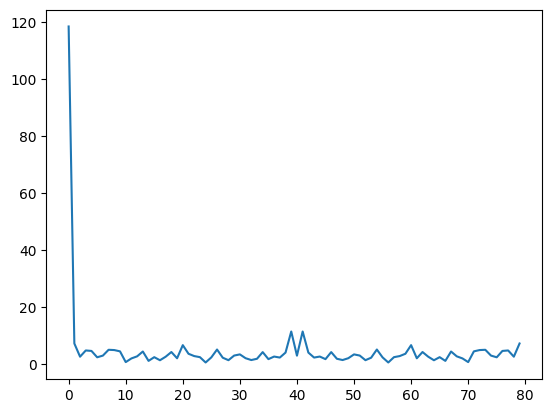

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load grayscale frames
frame_diffs = []
prev = None
cap = cv2.VideoCapture(file_name)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV)
    if prev is not None:
        diff = np.abs(gray.astype(float) - prev.astype(float)).mean()
        frame_diffs.append(diff)
    prev = gray

# Apply FFT to temporal differences
fft_vals = np.fft.fft(frame_diffs)
frequencies = np.abs(fft_vals)

# Plotting would show spikes in high-frequency values → flickering detection
plt.plot(frequencies)


Теперь применим БПФ, чтобы убрать мерцание. Но у некоторых видео может не быть результата при таком подходе, потому что многие разработчики генеративного AI уже используют аналогичные методы для генерируемых видео.

In [17]:
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# ========== CONFIG ==========
VIDEO_PATH = file_name
OUTPUT_PATH = "corrected_color_video.mp4"
FPS = 60
TEMPORAL_WINDOW = 0.1
FFT_SPIKE_THRESHOLD = 0.5
CUTOFF_RATIO = 0.1
# ============================

def load_video_yuv_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    y_frames, uv_frames = [], []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        yuv = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV)
        y, u, v = cv2.split(yuv)
        y_frames.append(y)
        uv_frames.append((u, v))
    cap.release()
    return y_frames, uv_frames

def compute_frame_diffs(frames):
    return [np.abs(frames[i].astype(np.float32) - frames[i - 1].astype(np.float32)).mean()
            for i in range(1, len(frames))]

def detect_flicker_fft(diffs):
    fft_vals = np.abs(np.fft.fft(diffs))
    mean_val, std_val = np.mean(fft_vals), np.std(fft_vals)
    flicker_indices = [i + 1 for i, v in enumerate(diffs) if v > mean_val + FFT_SPIKE_THRESHOLD * std_val]
    return flicker_indices

def temporal_median_filter(frames, index, window=3):
    half_k = window // 2
    start, end = max(0, index - half_k), min(len(frames), index + half_k + 1)
    neighbors = frames[start:end]
    median_frame = np.median(np.stack(neighbors), axis=0)
    return median_frame.astype(np.uint8)

def save_video_color(y_frames, uv_frames, output_path, fps=30):
    height, width = y_frames[0].shape
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    for y, (u, v) in zip(y_frames, uv_frames):
        yuv = cv2.merge([y, u, v])
        bgr = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
        out.write(bgr)
    out.release()

def plot_flicker_comparison(before_diffs, after_diffs, output="flicker_plot.png"):
    plt.figure(figsize=(12, 6))
    plt.plot(before_diffs, label="Before Correction", color='red', linewidth=1.5)
    plt.plot(after_diffs, label="After Correction", color='green', linewidth=1.5)
    plt.title("Flicker Detection: Frame-to-Frame Intensity Difference")
    plt.xlabel("Frame Index")
    plt.ylabel("Mean Pixel Difference")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output)
    plt.show()

def main():
    print("Loading video...")
    y_frames, uv_frames = load_video_yuv_frames(VIDEO_PATH)

    print("Computing flicker differences (before)...")
    before_diffs = compute_frame_diffs(y_frames)
    flickering_indices = detect_flicker_fft(before_diffs)
    print(f"Detected {len(flickering_indices)} flickering frames.")

    print("Applying flicker correction...")
    corrected_y = []
    for i in tqdm(range(len(y_frames))):
        if i in flickering_indices:
            fixed = temporal_median_filter(y_frames, i, TEMPORAL_WINDOW)
        else:
            fixed = y_frames[i]
        corrected_y.append(fixed)

    print("Computing flicker differences (after)...")
    after_diffs = compute_frame_diffs(corrected_y)

    print("Saving corrected video...")
    save_video_color(corrected_y, uv_frames, OUTPUT_PATH, fps=FPS)

    # print("Plotting flicker comparison...")
    # plot_flicker_comparison(before_diffs, after_diffs)
    changes = [ p-q for p,q in zip(before_diffs, after_diffs)]
    print(max(changes))
    if max(changes) == 0:
      print("👌Это нормально для видео, сгенерированного нейронными сетями,")
      print("потому что они уже проводили такие чистки, прежде чем отдавать видео пользователю. 😊")

    print(f"✅ Process complete. Output saved to: {OUTPUT_PATH}")

if __name__ == "__main__":
    main()


Loading video...
Computing flicker differences (before)...
Detected 0 flickering frames.
Applying flicker correction...


100%|██████████| 81/81 [00:00<00:00, 302527.72it/s]

Computing flicker differences (after)...
Saving corrected video...


0.0
👌Это нормально для видео, сгенерированного нейронными сетями,
потому что они уже проводили такие чистки, прежде чем отдавать видео пользователю. 😊
✅ Process complete. Output saved to: corrected_color_video.mp4


**Добавим водяной знак при помощи Быстрого Преобразования Фурье.**
Добавим его в частотный диапазон, так, чтобы он был скрыт от посторонних глаз, но программно обнаруживаемым. Это может быть нужно например для того, чтобы обезопасить свою интеллектуальную собственность. При желании можете добавить водяной знак в видимую область.

In [18]:
import cv2
import numpy as np
from scipy.fft import fft2, ifft2

# Load video
video_path = file_name
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create output video writer
out = cv2.VideoWriter("watermarked_video.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

# Create text watermark (e.g., a binary image)
watermark_text = "172196"
watermark = np.zeros((100, 100), dtype=np.float32)
cv2.putText(watermark, watermark_text, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255), 2)
watermark /= 255.0  # Normalize to [0, 1]

# Watermark strength
alpha = 0.1

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)

    # Compute FFT
    fft_frame = fft2(gray)

    # Resize watermark to match frame size (pad with zeros)
    watermark_padded = np.zeros_like(gray)
    watermark_padded[:watermark.shape[0], :watermark.shape[1]] = watermark

    # Compute FFT of watermark
    fft_watermark = fft2(watermark_padded)

    # Embed watermark
    fft_watermarked = fft_frame + alpha * fft_watermark

    # Inverse FFT to get watermarked frame
    watermarked_frame = np.abs(ifft2(fft_watermarked)).astype(np.uint8)

    # Convert back to BGR for video writing
    watermarked_frame_bgr = cv2.cvtColor(watermarked_frame, cv2.COLOR_GRAY2BGR)

    # Write to output video
    out.write(watermarked_frame_bgr)

cap.release()
out.release()

Теперь проверим, что знак на месте:

In [19]:
import cv2
import numpy as np
from scipy.fft import fft2, ifft2
from scipy.signal import correlate2d

# Load watermarked video
video_path = "watermarked_video.mp4"
cap = cv2.VideoCapture(video_path)

# Load original watermark
watermark = np.zeros((100, 100), dtype=np.float32)
cv2.putText(watermark, "172196", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255), 2)
watermark /= 255.0

# Watermark strength used during embedding
alpha = 0.1

# Process a single frame (or loop for multiple frames)
ret, frame = cap.read()
if ret:
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float32)

    # Compute FFT of the frame
    fft_frame = fft2(gray)

    # Estimate watermark by assuming original frame's FFT is unavailable
    # Use high-pass filtering or subtraction if original frame is available
    fft_watermark_estimated = fft_frame / alpha  # Simplified; adjust based on method

    # Inverse FFT to extract watermark
    extracted_watermark = np.abs(ifft2(fft_watermark_estimated))

    # Resize extracted watermark to match original watermark size
    extracted_watermark = extracted_watermark[:watermark.shape[0], :watermark.shape[1]]

    # Compute correlation
    correlation = correlate2d(extracted_watermark, watermark, mode="same")
    max_correlation = np.max(correlation)

    # Threshold to decide if watermark is present
    threshold = 0.5  # Adjust based on testing
    if max_correlation > threshold:
        print("Watermark detected!")
    else:
        print("Watermark not detected.")

cap.release()

Watermark detected!




---



## Дискретное косинусное преобразование

С математической точки зрения дискретное косинусное преобразование (DCT) и быстрое преобразование Фурье (FFT) отличаются несколькими ключевыми аспектами:

1. **Базовые функции**:
   - **DCT**: Использует в качестве базисных функций только косинусные функции. DCT последовательности $ x[n] $ задается формулой: $$X[k] = \sum_{n=0}^{N-1} x[n] \cos \left( \frac{\pi}{N} \left( n + \frac{1}{2} \right) k \right)$$
   - **FFT**: Использует как синусоидальные, так и косинусоидальные функции (комплексные экспоненты) в качестве базовых функций. БПФ последовательности $ x[n] $ задается формулой:$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N} kn}$$

2. **Симметрия**:
   - **DCT**: Предполагается, что сигнал равномерно симметричен по границам, что помогает уменьшить искажения при сжатии изображения.
   - **FFT**: Не предполагает какой-либо определенной симметрии, что делает его более гибким для различных типов сигналов.

3. **Комплексность**:
   - **DCT**: Обычно работает с реальными данными и приводит к получению реальных коэффициентов.
   - **FFT**: Работает с комплексными значениями и приводит к получению комплекснозначных коэффициентов, которые могут представлять информацию как о величине, так и о фазе.

4. **Сжатие**:
   - **DCT**: Имеет тенденцию концентрировать большую часть энергии сигнала в нескольких низкочастотных компонентах, что делает его очень эффективным для сжатия.
   - **FFT**: Распределяет энергию как по низким, так и по высоким частотам, обеспечивая полное частотное представление.

5. **Граничные условия**:
   - **DCT**: Граничные условия предполагают, что сигнал распространяется симметрично, что помогает свести к минимуму разрывы на границах.
   - **FFT**: Граничные условия предполагают, что сигнал является периодическим, что иногда может приводить к разрывам, если сигнал не является естественным образом периодическим.

**Сожмём отдельный кадр или отфильтруем шум.**

На практике может быть нужно сжать каждый отдельный кадр, без использования кодека целиком.

In [22]:
import cv2
import numpy as np
from scipy.fftpack import dct, idct

def apply_dct(image):
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

def apply_idct(coeffs):
    return idct(idct(coeffs.T, norm='ortho').T, norm='ortho')

# Load a single frame
cap = cv2.VideoCapture(file_name)
ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Apply DCT
dct_coeffs = apply_dct(gray)
# Zero out small coefficients for compression
threshold = 10
dct_coeffs[np.abs(dct_coeffs) < threshold] = 0

# Reconstruct frame
reconstructed = apply_idct(dct_coeffs)
cv2.imwrite("compressed_frame.png", np.clip(reconstructed, 0, 255))


True



---



## Вейвлет преобразование

*Понимаю, что тема огромная, есть много чего рассказать по теме, но к сожалению, могу дать только общие направления для самостоятельного изучения, так как вся тема невлезает в курс никак. Может быть у меня получится сделать углубленный курс "Вычислительная Математика II", где эту тему выйдет разобрать самостоятельно, но пока посмотрим на неё только самым краешком.*

Вейвлет-преобразование фактически является развитием идеи преобразования Фурье. Если в преобразовании Фурье мы имели волну на всем интервале, то Вейвлет преобразование позволяет иметь мини-волны. Вейвлет-преобразование (ВП) более универсально, потому что оно может анализировать как периодические сигналы, так и непериодические сигналы, а также сигналы со скачками. Кроме того, вейвлет-преобразование помогает выделить компоненты сигнала с разными временными масштабами, что дает возможность более гибко анализировать сигнальный профиль. БПФ, с другой стороны, лучше подходит для периодических сигналов.

Вейвлет-преобразование (ВП) может применяться при работе с видео для нескольких целей. Например, оно помогает выделить низкочастотные компоненты видео, что полезно для устранения высокочастотного шума, таких как зернистость или артефакты сжатия без потерь. Вейвлет-преобразование также полезно для сегментации видео, так как позволяет выделить контуры и границы объектов в кадрах видео.

Подробнее знакомиться с вейвлет-преобразованием можно попробовать [отсюда](https://habr.com/ru/articles/451278/).

А ещё у вейвлет-преобразования есть тоже куча вариаций включая быстрое вейвлет-преобразование.

In [25]:
%pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.9 MB/s eta 0:00:00


In [26]:
import pywt
import cv2
import numpy as np

cap = cv2.VideoCapture(file_name)
ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Apply wavelet transform
coeffs2 = pywt.dwt2(gray, 'haar')
cA, (cH, cV, cD) = coeffs2

# Zero out detail coefficients for denoising
cH.fill(0)
cV.fill(0)
cD.fill(0)

# Reconstruct the image
reconstructed = pywt.idwt2((cA, (cH, cV, cD)), 'haar')
cv2.imwrite("denoised_frame.png", np.clip(reconstructed, 0, 255))


True



---



## Метод главных компонент

На прошлом практическом занятии мы уже знакомились с этим методом. Теперь попробуем применить его к матрицам кадров видео.

In [28]:
import cv2
from sklearn.decomposition import PCA
import numpy as np

# Read video and extract grayscale frames
cap = cv2.VideoCapture(file_name)
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(gray.flatten())  # flatten each frame

# Apply PCA to reduce feature space (from 921600 to 100 components)
pca = PCA(n_components=50)
reduced_frames = pca.fit_transform(frames)

Ловила ошибку

```
n_components=100 must be between 0 and min(n_samples, n_features)=81 with svd_solver='full'
```
исправила количество компонент на 50


**Используя метод K-средних найдем кадры, в которых меняется сцена.**

Это стало доступно благодаря тому, что мы уменьшили пространство признаков с помощью метода главных компонент и вычислению собственных значений каждого кадра (матриц значений интенсивностей в каждом пикселе).

In [29]:
from sklearn.cluster import KMeans

# Assuming 'reduced_frames' from the previous code is available

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0) # Adjust n_clusters as needed
kmeans.fit(reduced_frames)
labels = kmeans.labels_

# Detect scene changes based on cluster label changes
scene_changes = []
for i in range(1, len(labels)):
    if labels[i] != labels[i - 1]:
        scene_changes.append(i)

print("Scene changes detected at frames:", scene_changes)

Scene changes detected at frames: [2, 3, 4, 6, 9, 10, 12, 15, 16, 18, 21, 24, 25, 27, 30, 33, 38, 40, 43, 47, 50, 53, 55, 58, 62, 63, 68, 73, 76, 80]


In [30]:
# prompt: convert scene_changes to video time seconds

import cv2

# Assuming 'scene_changes' and 'cap' (from the previous code) are available

# Get video's FPS
fps = cap.get(cv2.CAP_PROP_FPS)

# Convert frame indices to seconds
scene_change_times = [change_index / fps for change_index in scene_changes]

print("Scene change times (seconds):", scene_change_times)


Scene change times (seconds): [0.13333333333333333, 0.2, 0.26666666666666666, 0.4, 0.6, 0.6666666666666666, 0.8, 1.0, 1.0666666666666667, 1.2, 1.4, 1.6, 1.6666666666666667, 1.8, 2.0, 2.2, 2.533333333333333, 2.6666666666666665, 2.8666666666666667, 3.1333333333333333, 3.3333333333333335, 3.533333333333333, 3.6666666666666665, 3.8666666666666667, 4.133333333333334, 4.2, 4.533333333333333, 4.866666666666666, 5.066666666666666, 5.333333333333333]




---



# Секция для Ваших экспериментов

Используя методы выше попробуйте улучшить или по крайней мере изменить своё видео. При необходимости, можете пользоваться любыми AI-ассистентами, но не забывайте конспектировать промпты и имейте в виду их способность врать и галлюцинировать. 🐤

Не стесняйтесь добавлять больше ячеек с кодом и с текстом так, чтобы Вам было удобно работать с файлом ноутбука.

Проявляйте настойчивость и решительность в достижении собственной цели. ❤️

In [4]:
import cv2
import numpy as np
from tqdm import tqdm

def enhance_sharpness(frame, strength=1.5):
    """Усиление резкости с помощью unsharp masking"""
    blurred = cv2.GaussianBlur(frame, (5, 5), 1.0)
    sharpened = cv2.addWeighted(frame, 1.0 + strength, blurred, -strength, 0)
    return np.clip(sharpened, 0, 255).astype(np.uint8)

def fft_postprocess(frame):
    """Постобработка с помощью FFT для усиления резкости и подавления шумов"""
    # Преобразуем в YUV и работаем с Y-каналом
    yuv = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV)
    y, u, v = cv2.split(yuv)

    # Применяем FFT к Y-каналу
    y_float = y.astype(float)
    fft = np.fft.fft2(y_float)
    fft_shift = np.fft.fftshift(fft)

    # Создаем маску для усиления высоких частот и подавления низких
    rows, cols = y.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), dtype=float)
    # Подавляем низкие частоты (центр) и усиливаем высокие
    r = 30  # Радиус подавления низких частот
    mask[crow-r:crow+r, ccol-r:ccol+r] = 0.5  # Легкое подавление низких частот
    mask = 1 + 0.5 * (1 - mask)  # Усиливаем высокие частоты

    # Применяем маску и обратное преобразование
    fft_shift = fft_shift * mask
    fft_ishift = np.fft.ifftshift(fft_shift)
    y_processed = np.fft.ifft2(fft_ishift).real

    # Нормализуем и преобразуем обратно в uint8
    y_processed = np.clip(y_processed, 0, 255).astype(np.uint8)

    # Собираем кадр
    yuv_processed = cv2.merge([y_processed, u, v])
    return cv2.cvtColor(yuv_processed, cv2.COLOR_YUV2BGR)

def add_watermark(frame, text="help me"):
    """Добавление водяного знака на кадр"""
    frame_copy = frame.copy()
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.0
    font_color = (255, 255, 255)  # Белый цвет
    thickness = 2
    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
    text_x = 10
    text_y = frame.shape[0] - 10  # Нижний левый угол
    cv2.putText(frame_copy, text, (text_x, text_y), font, font_scale, font_color, thickness, cv2.LINE_AA)
    return frame_copy

def interpolate_frames(prev, next, alpha=0.5):
    """Интерполяция с сохранением всех цветовых каналов и улучшенной четкостью"""
    prev_yuv = cv2.cvtColor(prev, cv2.COLOR_BGR2YUV)
    next_yuv = cv2.cvtColor(next, cv2.COLOR_BGR2YUV)
    prev_y, prev_u, prev_v = cv2.split(prev_yuv)
    next_y, next_u, next_v = cv2.split(next_yuv)

    flow_forward = cv2.calcOpticalFlowFarneback(
        prev_y, next_y, None, pyr_scale=0.4, levels=5, winsize=25, iterations=3, poly_n=7, poly_sigma=1.5, flags=0
    )
    flow_backward = cv2.calcOpticalFlowFarneback(
        next_y, prev_y, None, pyr_scale=0.4, levels=5, winsize=25, iterations=3, poly_n=7, poly_sigma=1.5, flags=0
    )

    h, w = flow_forward.shape[:2]
    grid_y, grid_x = np.mgrid[0:h, 0:w]

    morph_forward = np.stack([grid_x, grid_y], axis=0) + alpha * flow_forward.transpose(2, 0, 1)
    morph_backward = np.stack([grid_x, grid_y], axis=0) - (1 - alpha) * flow_backward.transpose(2, 0, 1)

    channels_forward = []
    channels_backward = []
    for channel in [prev_yuv, next_yuv]:
        y, u, v = cv2.split(channel)
        for ch in [y, u, v]:
            interp_forward = cv2.remap(
                ch, morph_forward[0].astype(np.float32), morph_forward[1].astype(np.float32), cv2.INTER_CUBIC
            )
            interp_backward = cv2.remap(
                ch, morph_backward[0].astype(np.float32), morph_backward[1].astype(np.float32), cv2.INTER_CUBIC
            )
            channels_forward.append(interp_forward)
            channels_backward.append(interp_backward)

    interpolated_y = (1 - alpha) * channels_forward[0] + alpha * channels_forward[3]
    interpolated_u = (1 - alpha) * channels_forward[1] + alpha * channels_forward[4]
    interpolated_v = (1 - alpha) * channels_forward[2] + alpha * channels_forward[5]

    interpolated_y = 0.5 * interpolated_y + 0.5 * ((1 - alpha) * channels_backward[0] + alpha * channels_backward[3])
    interpolated_u = 0.5 * interpolated_u + 0.5 * ((1 - alpha) * channels_backward[1] + alpha * channels_backward[4])
    interpolated_v = 0.5 * interpolated_v + 0.5 * ((1 - alpha) * channels_backward[2] + alpha * channels_backward[5])

    interpolated_yuv = cv2.merge([
        np.uint8(np.clip(interpolated_y, 0, 255)),
        np.uint8(np.clip(interpolated_u, 0, 255)),
        np.uint8(np.clip(interpolated_v, 0, 255))
    ])
    interpolated_bgr = cv2.cvtColor(interpolated_yuv, cv2.COLOR_YUV2BGR)

    # Применяем FFT и резкость только к интерполированным кадрам
    interpolated_bgr = fft_postprocess(interpolated_bgr)
    return enhance_sharpness(interpolated_bgr, strength=1.2)

# Загрузка исходного видео
file_name = 'video.mp4'
cap = cv2.VideoCapture(file_name)
original_fps = cap.get(cv2.CAP_PROP_FPS)
slowdown_factor = 0.9  # Замедление до x0.9
n_interpolated = 2  # Количество интерполированных кадров между каждой парой
target_fps = original_fps * (n_interpolated + 1) / slowdown_factor  # Увеличиваем FPS
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Чтение кадров
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()

# Интерполяция кадров
new_frames = []
for i in tqdm(range(len(frames)-1), desc="Interpolating frames"):
    prev, next = frames[i], frames[i+1]
    new_frames.append(add_watermark(prev))  # Исходный кадр с водяным знаком
    # Добавляем два интерполированных кадра
    new_frames.append(add_watermark(interpolate_frames(prev, next, alpha=0.33)))
    new_frames.append(add_watermark(interpolate_frames(prev, next, alpha=0.66)))
new_frames.append(add_watermark(frames[-1]))

# Сохранение результата
out = cv2.VideoWriter('slow_motion.mp4', cv2.VideoWriter_fourcc(*'mp4v'), target_fps, (width, height))
for frame in tqdm(new_frames, desc="Writing video"):
    out.write(frame)
out.release()

Writing video: 100%|██████████| 241/241 [00:00<00:00, 251.13it/s]


## Расскажите, что хотели сделать, что получилось, а что не получилось:

Хотела замедлить видео, что бы попробовать убрать дерганность, а потом попробовать увеличить количество кадров, что бы сохранить прежний fps. В моем понимании это должно сделать видео чуть менее дерганным.

В процессе полетелы цветовый каналы, но удалось исправить. Но изображение "поплыло", т.е. стало сильно менее четким. Сдалась, пошла к Гроку (сегодня день использования новых нейросетей) с промптом "првоерь замедление и добавление вотермарки, перепиши код так, что бы он работал".

следующий промпт: "итоговая частота кадров недостаточная, проверь, что используешь методы (перечисление методов из сегодняшнего занятия)".

Частоты кадров хорошая, но появилось мигание. Попробую поменять уже потом. https://t.me/computationalmath25/2987/3277



---



## Изменим кодек видео

Кодек по сути определяет то, как меняются кадры и как они хранятся в файле. Кодек всегда должен состоять из кодера и декодера, чтобы хранить и воспроизводить видео.

Самые первые кодеки решали задачу практически в лоб и были неоптимальны. Развитие вычислительной математики и вычислительной техники позволило существенно повысить качество видео (например, разрешение 8k) и сжимать видео намного более эффективно. Так, некоторые кадры могут целиком выбрасываться, а вместо них использоваться интерполированные значения опорных кадров.

Очень распространён уже старенький кодек H264 (2003 год).
Сейчас активно мигрируют на H265, в то время как в 2020 уже вышел H266, но его внедрение сильно замедлено из-за старого оборудования и высокой вычислительной сложности кодека. А между прочим, H266 позволяет сжимать битрейт в 2 раза больше по сравнению с H265 при таком же качестве.

Для работы этих методов потребуется фреймворк ffmpeg, который уже предустановлен на Colab. Но её также можно установить самостоятельно. [Официальная документация](https://ffmpeg.org/ffmpeg-all.html#Codec-Options).

Мы будем использовать Python утилиты, поверх неё.

In [31]:
%pip install moviepy imageio-ffmpeg
%pip show moviepy

Name: moviepy
Version: 1.0.3
Summary: Video editing with Python
Home-page: https://zulko.github.io/moviepy/
Author: Zulko 2017
Author-email: 
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: decorator, imageio, imageio-ffmpeg, numpy, proglog, requests, tqdm
Required-by: 


In [5]:
from moviepy.video.io.VideoFileClip import VideoFileClip
import imageio_ffmpeg as ffmpeg
import subprocess
import json
import os

def get_probe(video_path):
    cmd = [
        "ffprobe",
        "-i", video_path,
        "-v", "error",
        "-select_streams", "v:0",
        "-show_entries", "stream=codec_name",
        "-of", "json"
    ]
    result = subprocess.run(cmd, capture_output=True, text=True)
    print(result)

    info = json.loads(result.stdout)
    return info['streams'][0]['codec_name']

video_path = os.path.abspath("slow_motion.mp4")
print(video_path)

with VideoFileClip(video_path) as video:
    print("Duration:", video.duration, "seconds")
    print("FPS:", video.fps)
    print("Resolution:", video.size)
    print("______")

print(get_probe(video_path))


/content/slow_motion.mp4
Duration: 4.82 seconds
FPS: 50.0
Resolution: [848, 480]
______
CompletedProcess(args=['ffprobe', '-i', '/content/slow_motion.mp4', '-v', 'error', '-select_streams', 'v:0', '-show_entries', 'stream=codec_name', '-of', 'json'], returncode=0, stdout='{\n    "programs": [\n\n    ],\n    "streams": [\n        {\n            "codec_name": "mpeg4"\n        }\n    ]\n}\n', stderr='')
mpeg4


In [6]:
import subprocess
import imageio_ffmpeg as ffmpeg
import os

def transcode_video(input_path, output_path, codec='libx265'):
    ffmpeg_path = ffmpeg.get_ffmpeg_exe()

    cmd = [
        ffmpeg_path,
        '-i', input_path,
        '-c:v', codec,
        '-crf', '28',           # Lower = better quality, range: 18–51 for H.265
        '-preset', 'medium',    # Options: ultrafast, superfast, veryfast, faster, fast, medium, slow, slower
        '-c:a', 'copy',         # Copy audio without re-encoding
        output_path
    ]

    try:
        subprocess.run(cmd, check=True)
        print(f"✅ Transcoded to {codec}: {output_path}")
    except subprocess.CalledProcessError as e:
        print("❌ Transcoding failed:", e)


In [7]:
# Transcode to H.265 (HEVC)
transcode_video(video_path, "output_h265.mp4", codec='libx265')

✅ Transcoded to libx265: output_h265.mp4


In [8]:
print('File H.265 Size in KiloBytes is ', (os.path.getsize("output_h265.mp4") / 1024))

File H.265 Size in KiloBytes is  199.3896484375


In [9]:
# Transcode to VP9 (WebM format recommended)
transcode_video(video_path, "output_vp9.webm", codec='libvpx-vp9')

✅ Transcoded to libvpx-vp9: output_vp9.webm


In [10]:
print('File VP9 Size in KiloBytes is ', (os.path.getsize("output_vp9.webm") / 1024))

File VP9 Size in KiloBytes is  389.9404296875


Теперь не забудьте скачать полученное видео и отправить его реплаем на своё предыдущее видео. (если сделали оба кодека, то выберите то, которое весит меньше).

## Был ли полученный Вами опыт полезен для Вас? Как ещё бы Вы хотели поупражняться в применении численных методов, включая как сами методы, так и прикладные области, и конкретные задачи.

Да, опыт очень полезный... Теперь моих друзей ждет спам видео с котиками из квена, который при этом будут улучшены и поправлены :3

Хочу попробовать применять численные методы для трекинга движений и распознования жестов (научить пк языкуу жестов, хм). На самом деле давно на них засматриваюсь, но все никак руки не дойдут. Теперь у меня есть немного информации, что бы начать




---



### Дополнительное (опциональное) задание: использование кодека H266
Ссылка на [репозиторий](https://github.com/fraunhoferhhi/vvenc).

In [ ]:
# ВАШ КОД ЗДЕСЬ

## Совсем уж дополнительное и хардкорное задание: реализовать свой простенький кодек по стандарту H265.

Согласно стандарту с точки зрения вычислительной математики должно быть реализовано следующее:

| Technique                       | Purpose                                    |
| ------------------------------- | ------------------------------------------ |
| **Intra/Inter Prediction**      | Spatial/temporal redundancy removal        |
| **DCT/DST**                     | Transform spatial data to frequency domain |
| **Quantization**                | Reduce precision of data (lossy step)      |
| **Motion Compensation**         | Reduce temporal redundancy                 |
| **CABAC**                       | Final lossless compression of data         |
| **Quadtree Block Partitioning** | Adaptive block sizes for better efficiency |



## Заметки по реализации игрушечного прототипа:

Кодек **H.265**, также известный как ** HEVC (High Efficiency Video Coding)**, использует ** сложную комбинацию алгоритмов сжатия видео**, в основном основанных на ** блочном преобразующем кодировании, компенсации движения, прогнозировании и энтропийном кодировании**. Вот краткое описание основных методов сжатия, используемых в H.265:

---

### ✅ **1. Внутрикадровое (пространственное) сжатие**

Каждый кадр сжимается индивидуально, как изображение.

* **Дискретное косинусное преобразование (DCT)** и **DST (дискретное синусоидальное преобразование)**:

  * Применяется к блокам пикселей (единицам преобразования) для преобразования пространственных данных в частотные.
  * Высокочастотные коэффициенты (менее заметные) квантуются или отбрасываются → уменьшается размер.

* **Внутреннее предсказание** (интерполяция):

  * Прогнозирует значения пикселей в кадре на основе соседних блоков (например, краев или текстур).
  * Сохраняется только разница (остаточная величина).

---

### ✅ **2. Межкадровое (временное) сжатие**

Использует преимущества сходства между кадрами (уменьшает временную избыточность).

* **Оценка и компенсация движения**:

  * Отслеживает, как блоки перемещаются из одного кадра в другой.
  * Сохраняет векторы движения вместо необработанных изменений в пикселях.
  * Для повышения точности можно использовать точность в несколько пикселей.

* **Опорные кадры (несколько)**:

  * Использует больше опорных кадров, чем H.264, что позволяет лучше прогнозировать.
  * Фреймы могут ссылаться как на прошлые, так и на будущие фреймы (двойное предсказание).

---

### ✅ **3. Преобразование и квантование**

Как только получены остатки предсказания (то, что остается после внутреннего/промежуточного предсказания):

* **Преобразующее кодирование**:

  * Использует DCT/DST для остатков.
  * Преобразует шаблоны пространственных ошибок в частотную область.

* **Квантование**:

  * Округляет частотные коэффициенты (на основе настроек качества).
  * Именно здесь происходит сжатие с наибольшими потерями.

---

### ✅ **4. Энтропийное кодирование**

Сжимает конечный поток данных, используя методы ** без потерь**.

* **CABAC (контекстно-адаптивное двоичное арифметическое кодирование)**:

  * Более эффективное, чем энтропийное кодирование в H.264.
  * Использует контекстное моделирование для динамической настройки вероятностей битов.
  * Очень хорошо работает с остатками, векторами движения и коэффициентами преобразования.

---

### ✅ **5. Разбиение на блоки на основе дерева квадрантов**

Вместо блоков фиксированного размера в H.265 используется структура на основе дерева квадрантов:

 **Блоки дерева кодирования (CTE)** размером до 64×64 пикселей.
* Каждый CTU может быть рекурсивно разделен на более мелкие **Блоки прогнозирования (PU)** и **Блоки преобразования (TU)**.
* Обеспечивает лучшую адаптацию к плоским и детализированным областям.

In [ ]:
# ВАШ КОД ЗДЕСЬ